<a href="https://colab.research.google.com/github/jarrodsb/DSPS_JBieber/blob/main/Labs/tensorflow_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pylab as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
x_train = x_train.astype(float) / 255.
#y_train = y_train.astype(float) / 255.
x_test = x_test.astype(float) / 255.
#y_test = y_test.astype(float) / 255.

In [6]:
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

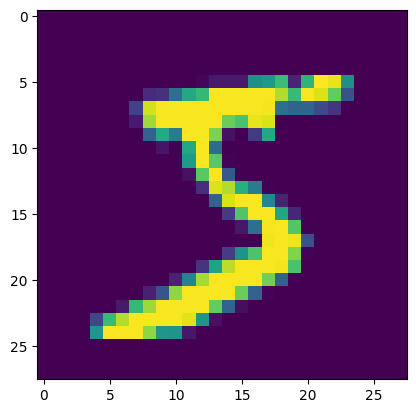

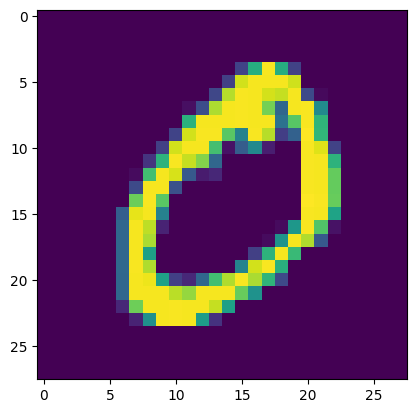

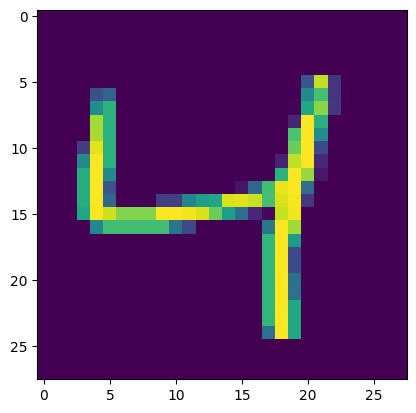

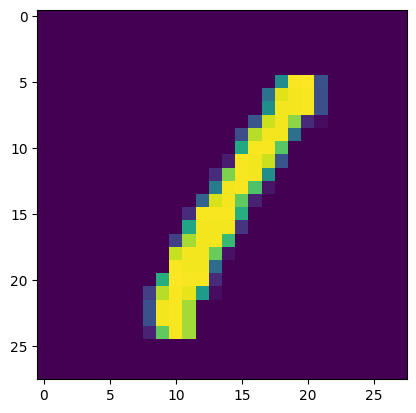

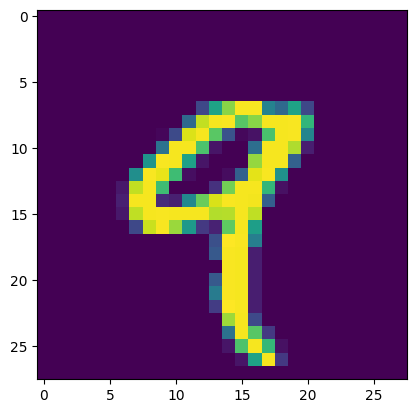

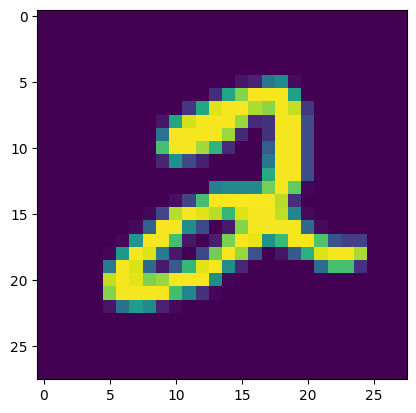

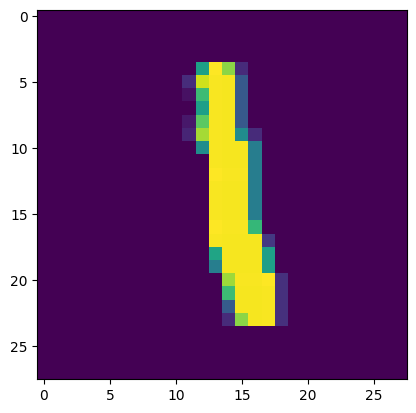

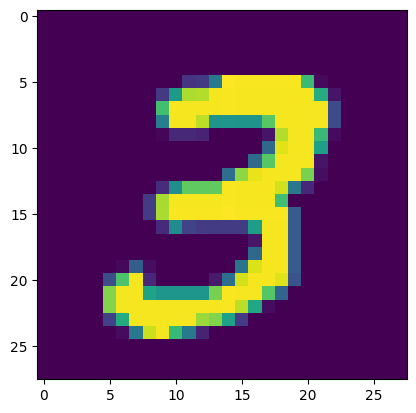

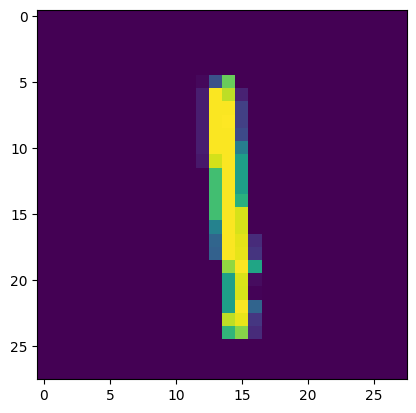

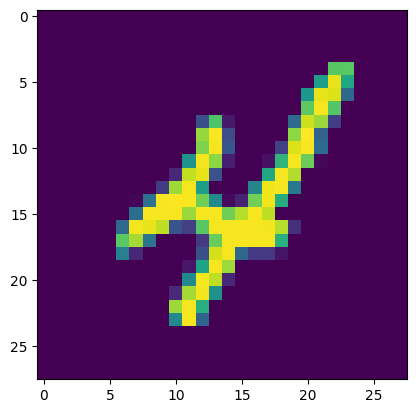

In [8]:
for i in range (10):
  plt.imshow(x_train[i])
  plt.show()

In [9]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
x_trainraveled = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2]*x_train.shape[3])

In [12]:
x_trainraveled.shape

(60000, 784)

In [13]:
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2]*x_test.shape[3])

In [14]:
mlp = keras.Sequential([
    layers.Dense(320, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(32, activation='sigmoid'),
    layers.Dense(10, activation='softmax')
])

In [15]:
mlp.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = mlp.fit(x_trainraveled, y_train, batch_size=120, epochs=10, validation_split=0.25, verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4768 - loss: 1.8258 - val_accuracy: 0.8957 - val_loss: 0.6449
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9081 - loss: 0.5171 - val_accuracy: 0.9297 - val_loss: 0.2963
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9405 - loss: 0.2577 - val_accuracy: 0.9445 - val_loss: 0.2116
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9539 - loss: 0.1824 - val_accuracy: 0.9543 - val_loss: 0.1696
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9652 - loss: 0.1380 - val_accuracy: 0.9601 - val_loss: 0.1458
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9704 - loss: 0.1154 - val_accuracy: 0.9642 - val_loss: 0.1295
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9764 - loss: 0.0877 - val_accuracy: 0.9654 - val_loss: 0.1203
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9806 - loss: 0.0734 - val_accuracy: 0.

In [17]:
history.history

{'accuracy': [0.6948444247245789,
  0.916088879108429,
  0.9413999915122986,
  0.9548444151878357,
  0.9652222394943237,
  0.9714000225067139,
  0.9769111275672913,
  0.9799333214759827,
  0.9844666719436646,
  0.9878666400909424],
 'loss': [1.3575565814971924,
  0.4250367283821106,
  0.24231526255607605,
  0.17546476423740387,
  0.134247824549675,
  0.10841943323612213,
  0.08729530870914459,
  0.07317553460597992,
  0.05965108424425125,
  0.04872274398803711],
 'val_accuracy': [0.8956666588783264,
  0.9297333359718323,
  0.9445333480834961,
  0.9542666673660278,
  0.9600666761398315,
  0.9642000198364258,
  0.965399980545044,
  0.9678666591644287,
  0.9690666794776917,
  0.9723333120346069],
 'val_loss': [0.6448912620544434,
  0.2963276505470276,
  0.21155618131160736,
  0.16957752406597137,
  0.14582180976867676,
  0.12949413061141968,
  0.1202768012881279,
  0.11396636068820953,
  0.10884926468133926,
  0.09757660329341888]}

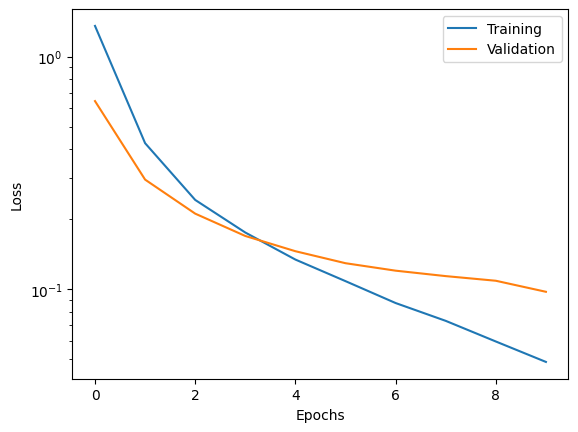

In [20]:
plt.plot(history.history['loss'], label="Training")
plt.plot(history.history['val_loss'], label="Validation")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')

In [21]:
mlp.evaluate(x_trainraveled, y_test)

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 60000
'y' sizes: 10000
